<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [19]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h5><font color = "#079e05"> RGB to CMYK </font></h5>

In [20]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):
    maxvalue = max(r, g , b)
    maxscale = float(maxvalue/255)

    c = round((float((maxvalue- r)/RGB_SCALE)/(maxscale))* CMYK_SCALE)
    m = round((float((maxvalue- g)/RGB_SCALE)/(maxscale))*CMYK_SCALE)
    y = round((float((maxvalue- b)/RGB_SCALE)/(maxscale))*CMYK_SCALE)
    k = round((1 - maxscale)*100)
    

    return c, m, y, k
print(rgb_to_cmyk(50,70,130))

(62, 46, 0, 49)


<h5><font color = "#079e05"> CMYK to RGB </font></h5>

In [21]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):
    r = round(RGB_SCALE * (1 - c/CMYK_SCALE) * (1 - k/CMYK_SCALE))
    g = round(RGB_SCALE * (1 - m/CMYK_SCALE) * (1 - k/CMYK_SCALE))
    b = round(RGB_SCALE * (1 - y/CMYK_SCALE) * (1 - k/CMYK_SCALE))


    return r, g, b

print(cmyk_to_rgb(62,46,0,49))

(49, 70, 130)


<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [22]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    image = cv2.imread('images/Q1/1.jpg')
    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)

  
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [23]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.

    '''
    image = cv2.imread('images/Q1/1.jpg')
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
   

        
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

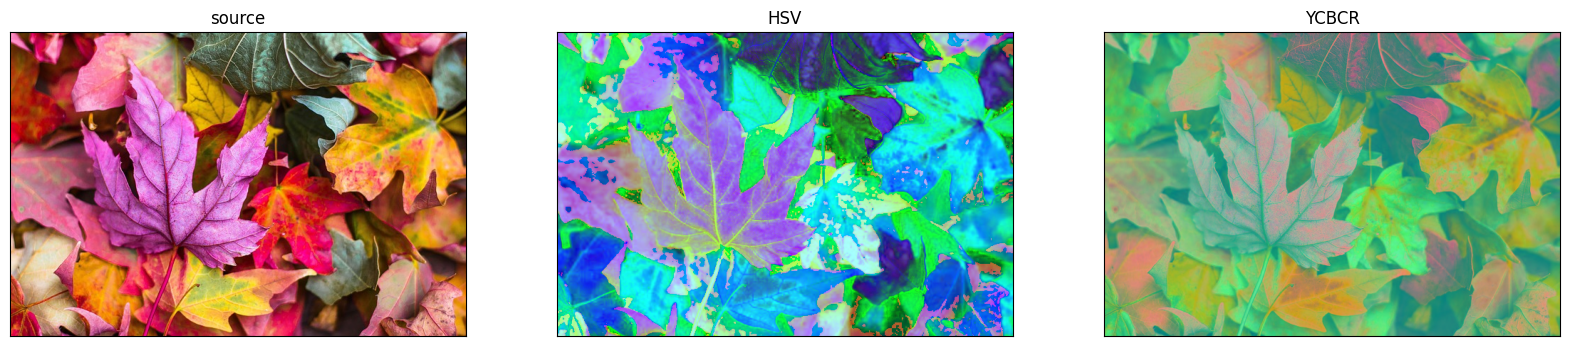

In [24]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

In [37]:
def sepearte_hsv(image):

    image = cv2.imread(image)
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(result)
    return h,s,v

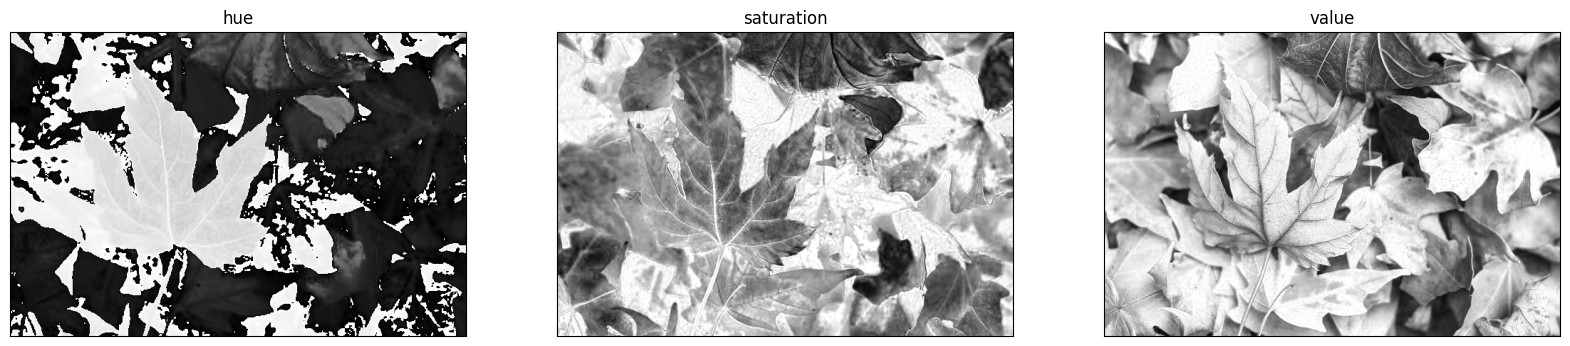

In [40]:
image_list = []
h,s,v = sepearte_hsv('images/Q1/1.jpg')
image_list.append([h, 'hue', 'img'])
image_list.append([s, 'saturation', 'img'])
image_list.append([v, 'value', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [41]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    image2 = cv2.resize(image2,(image1.shape[1],image1.shape[0]),interpolation=cv2.INTER_AREA)
    result = cv2.merge((image1,image2,image2))
    
    return result

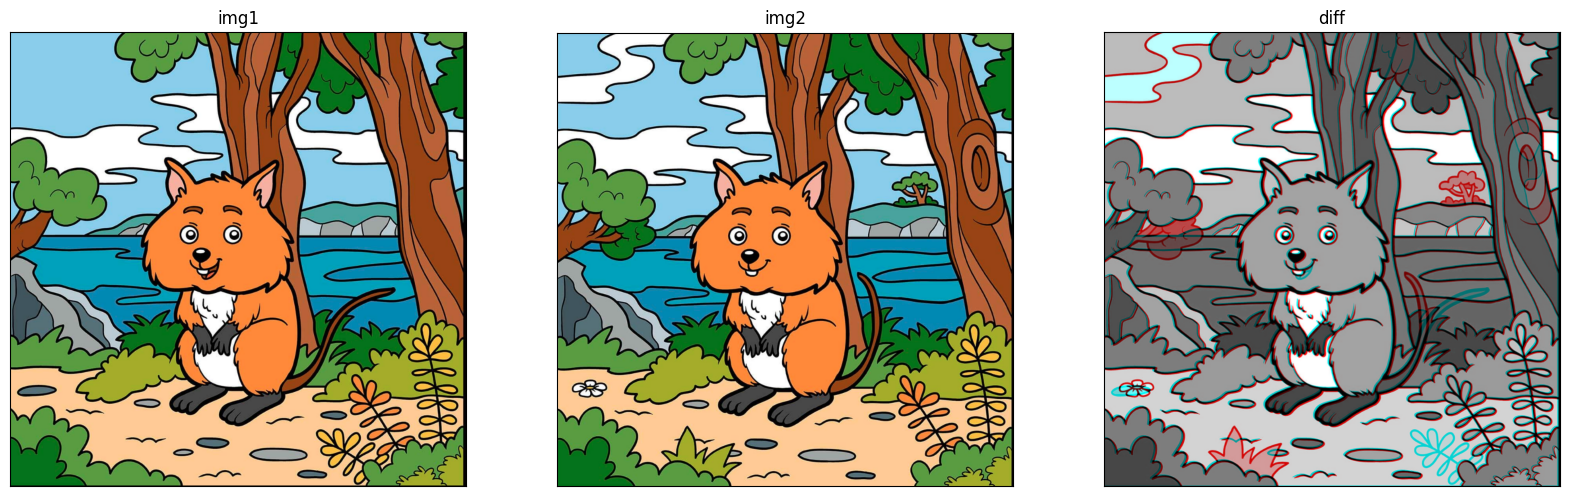

In [42]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')